# Initialisation

In [1]:
from SL_model import SL_model
from spharm import legendre, GaussQuad
from time import time
import numpy as np
if __name__ == '__main__':
    model=SL_model(maxdeg=256,nb_workers=12,topo_it_max=10,k_max=10) # Generate the model base
    model.set_from_file('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/VM5a.256result_27.10.2022_19.14.33')
    model.data_way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/'
    model.love_way=model.data_way+'VM5a'
    model.ice_way=model.data_way+'ice6G_data.mat'
    model.sed_way=model.data_way+'Irrawady_sedimentationgrid.mat'
    model.topo_way=model.data_way+'topo_SL.mat'
    model.P_lm=legendre(model.maxdeg,model.pool) #Calculate the Legendre associated functions for the Gaussian grid
    model.x, model.w= GaussQuad(model.maxdeg) # calculate the Gaussian grid parameters

    model.create_GRID() #create the grid framework

    model.create_parameters() #Create all grid parameters


    model.ice.quick_load(model.grid,model.pool,model.ice_way) #set the ice model
    model.sed.load(model,model.sed_way) # set the sedimentation model
    model.topo.load(model,model.topo_way) # set the topography model, this function need the sediment and ice model ! 
    #Disk_load=model.grid.disk(model,0,180,1,100)
    # we need to calculate the ocean function after setting the topography due to it's dependencies
    model.create_ocean(model.topo.topo_pres) # create the ocean function (see theoria (TABOO), spada et al., 2003) from the actual topography.
    model.sed.rho=model.data['rho_sed']
    model.oc.rho=model.data['rho_sea']
    model.ice.rho=model.data['rho_ice']
    model.grid.time_step=model.time_step
    model.ice.ice_corrected=model.data['ice_corrected']
    model.SL.delS.saved=model.data['delS']
    model.SL.sdelS.saved=model.data['sdelS']
    model.topo.topo=model.data['topo']

In [2]:
import pickle
way='C:/Users/ahenry01/Desktop/Python_code/SL_C0de_output/VM5a.256_postt'
with open(way+'.pkl', 'rb') as handle:
            data = pickle.load(handle)
model.delR_e_o=data['delR_e_o']
model.delR_e_s=data['delR_e_s']
model.delR_e_i=data['delR_e_i']
model.delR_v_o=data['delR_v_o']
model.delR_v_s=data['delR_v_s']
model.delR_v_i=data['delR_v_i']
model.delG_e_o=data['delG_e_o']
model.delG_e_s=data['delG_e_s']
model.delG_e_i=data['delG_e_i']
model.delG_v_o=data['delG_v_o']
model.delG_v_s=data['delG_v_s']
model.delG_v_i=data['delG_v_i']
model.delSL=data['delSL']
ESL=data['ESL']

# Love numbers analysis

# Calcul de la déformation du géoïde et de la terre

# Initialize plots parameters

In [3]:
# set figure output
way='C:/Users/ahenry01/Desktop/Python_code/RSL_calc/'

In [4]:
model.init_resolution_plot(1024)


In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'savefig.bbox':'tight'})
sediment_color=(0.4,0.7,0.5)
sediment_color_dark=(0.2,0.4,0.25)
ice_color=(0.1,0.8,0.8)
ocean_color=(0.2,0.2,0.6)
lat_map=[-90,90]
lon_map=[0,360]
time_plot=0.5
time_ind=np.where(model.time_step==time_plot)[0][0]
name=['Amazon','Changjianh','Congo','Fly','Gange','Godavari','Indus','Irrawaddy','Mekong','Mississippi','Orinoco','Nile','Center_pacific']
lat_pt=np.array([0.32354,32.21453,-6.074738,-8.37217,21.66387,16.41329,23.833,15.92887,9.77248,28.967,9.691,31.72728,0])
lon_pt=np.array([-50.0688,119.52615,12.399068,143.18845,89.16045,82.02666,67.617,94.82227,106.58056,-89.283,-61.229,31.12304,225])
lon_pt[lon_pt<0]=lon_pt[lon_pt<0]+360

In [6]:
from spharm import sphericalobject
model.calc_RSL()
divnorm=colors.TwoSlopeNorm(vcenter=0.)
f=plt.pcolor(model.grid.elons,model.grid.lats,model.SL.RSL[0,:,:],cmap="seismic",norm=divnorm)
plt.contour(model.grid.elons,model.grid.lats,model.topo.topo_pres,levels=[0])
plt.colorbar(f)

NameError: name 'colors' is not defined

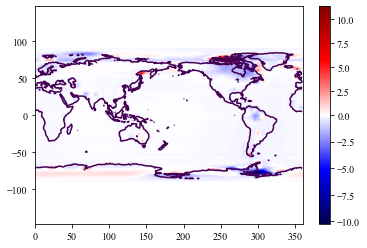

In [7]:
from spharm import sphericalobject
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vcenter=0.)
#a=(model.delR_e_i[1,:]+model.delR_v_i[1,:])/24000
grd=sphericalobject(model.delSL[-2,:]-model.delSL[-1,:],'coeff').coefftogrd_hd(model)
f=plt.pcolor(model.elons_res,model.lats_res,grd,norm=divnorm,cmap='seismic')
plt.contour(model.grid.elons,model.grid.lats,model.topo.topo_pres,levels=[0])
plt.colorbar(f)
plt.axis('equal')
plt.show()


In [ ]:
from spharm import sphericalobject
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vcenter=0.)
#a=(model.delR_e_i[1,:]+model.delR_v_i[1,:])/24000
grd=sphericalobject(model.delSL[1,:]-model.delSL[-1,:],'coeff').coefftogrd_hd(model)
f=plt.pcolor(model.elons_res,model.lats_res,grd,norm=divnorm,cmap='seismic')
plt.contour(model.grid.elons,model.grid.lats,model.topo.topo_pres,levels=[0])
plt.colorbar(f)
plt.axis('equal')
plt.show()


In [ ]:
lon_grid,lat_grid=np.meshgrid(model.elons_res,model.lats_res)
import pandas
table=pandas.DataFrame(np.concatenate((np.expand_dims(lon_grid.flatten(),1),np.expand_dims(lat_grid.flatten(),1),np.expand_dims(grd.flatten(),1)),1),columns=['Lon','Lat','Subsidence'])
print(table)
table.to_csv(way+'Subsidence.csv')

# Show area

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vcenter=0.)

lat_min=np.absolute(model.grid.lats-lat_map[0]).argmin()
lat_max=np.absolute(model.grid.lats-lat_map[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.grid.elons-lon_map[0]).argmin()
lon_max=np.absolute(model.grid.elons-lon_map[1]).argmin()
sed_cut=model.sed.sed[time_ind-1,:,:]-model.sed.sed[time_ind,:,:]
sed_cut=sed_cut[lat_min:lat_max,lon_min:lon_max]
topo=model.topo.topo_pres[lat_min:lat_max,lon_min:lon_max]
lati=model.grid.lats[lat_min:lat_max]
long=model.grid.elons[lon_min:lon_max]
fig_sed_act,ax=plt.subplots()
sp=ax.pcolor(long,lati,topo,cmap='terrain',norm=divnorm)
ax.contour(long,lati,topo,levels=[0])
ax.scatter(lon_pt,lat_pt,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax.grid()
plt.colorbar(sp,label='altitude(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax.legend(loc='lower left',prop={'size': 8})
plt.show()

In [ ]:
divnorm=colors.TwoSlopeNorm(vcenter=0.)

lat_min=np.absolute(model.grid.lats-lat_map[0]).argmin()
lat_max=np.absolute(model.grid.lats-lat_map[1]).argmin()
if lat_min>lat_max :
    temps=lat_max
    lat_max=lat_min
    lat_min=temps
lon_min=np.absolute(model.grid.elons-lon_map[0]).argmin()
lon_max=np.absolute(model.grid.elons-lon_map[1]).argmin()
sed_cut=model.sed.sed[time_ind-1,:,:]-model.sed.sed[time_ind,:,:]
sed_cut=sed_cut[lat_min:lat_max,lon_min:lon_max]
topo=model.topo.topo[2,lat_min:lat_max,lon_min:lon_max]
lati=model.grid.lats[lat_min:lat_max]
long=model.grid.elons[lon_min:lon_max]
fig_sed_act,ax=plt.subplots()
sp=ax.pcolor(long,lati,topo,cmap='terrain',norm=divnorm)
ax.contour(long,lati,topo,levels=[0])
ax.scatter(lon_pt,lat_pt,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax.grid()
plt.colorbar(sp,label='altitude(m)')
ax.set_aspect('equal',adjustable='box')
ax.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax.legend(loc='lower left',prop={'size': 8})
plt.show()

In [ ]:
# export as raster
lon_grid,lat_grid=np.meshgrid(model.grid.elons,model.grid.lats)
import pandas
table=pandas.DataFrame(np.concatenate((np.expand_dims(lon_grid.flatten(),1),np.expand_dims(lat_grid.flatten(),1),np.expand_dims(model.topo.topo[2,:,:].flatten(),1)),1),columns=['Lon','Lat','Topo_24'])
print(table)
table.to_csv(way+'topo_24.csv')

In [ ]:
fig_sed_act.savefig(way+'map_'+ str(time_plot) +'.svg',format='svg')

# Initialize the topography and sediment for the area of plot

# Relative Sea level plot

In [8]:
from spharm import sphericalobject
RSL_pt=np.zeros((len(lat_pt),model.time_step_number))
ind_lat_pt=np.abs(model.lats_res.repeat(len(lat_pt)).reshape(1024,len(lat_pt))-lat_pt.transpose()).argmin(0)
ind_lon_pt=np.abs(model.elons_res.repeat(len(lon_pt)).reshape(1024*2,len(lon_pt))-lon_pt.transpose()).argmin(0)
#RSL_tot=sphericalobject(model.topo.topo[-1,:,:]-model.topo.topo[0,:,:]+model.ice.ice_corrected[0,:,:]-model.ice.ice_corrected[-1,:,:]).grdtocoeff(model).coefftogrd_hd(model)
for t_it in range (model.time_step_number):
    print(model.time_step[t_it])
    RSL_at=sphericalobject(model.delSL[t_it,:]-model.delSL[-1,:],'coeff').coefftogrd_hd(model)
    #RSL_pt[:,t_it]=model.SL.RSL[t_it,ind_lat_pt,ind_lon_pt]
    RSL_pt[:,t_it]=RSL_at[ind_lat_pt,ind_lon_pt]

26.0
25.0
24.0
23.0
22.0
21.0
20.5
20.0
19.5
19.0
18.5
18.0
17.5
17.0
16.5
16.0
15.5
15.0
14.5
14.0
13.5
13.0
12.5
12.0
11.5
11.0
10.5
10.0
9.5
9.0
8.5
8.0
7.5
7.0
6.5
6.0
5.5
5.0
4.5
4.0
3.5
3.0
2.5
2.0
1.5
1.0
0.5


In [76]:
zoom=[0,8,-3,0.2]

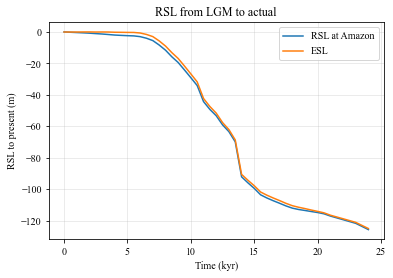

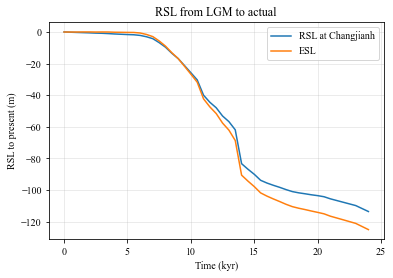

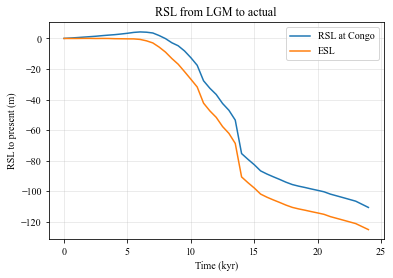

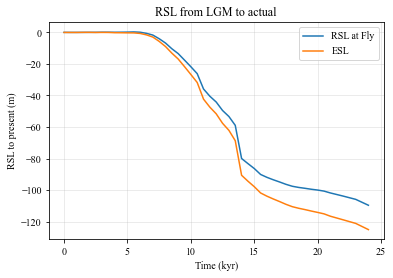

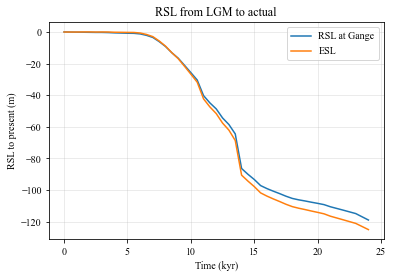

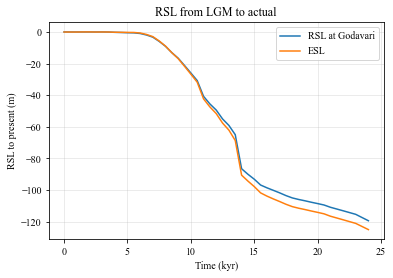

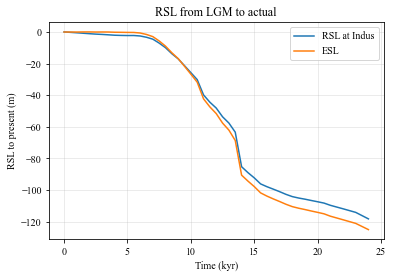

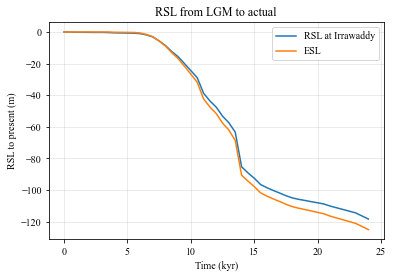

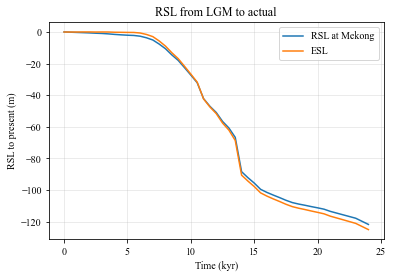

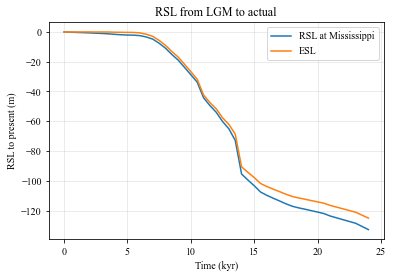

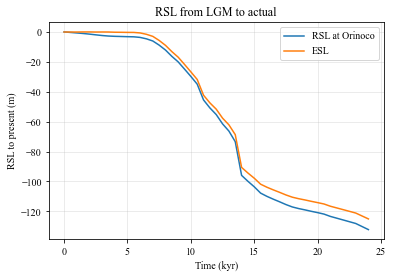

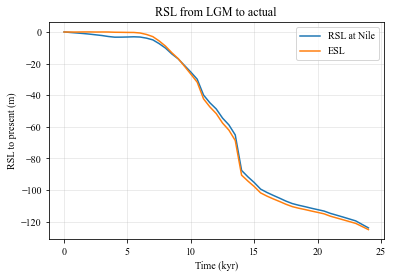

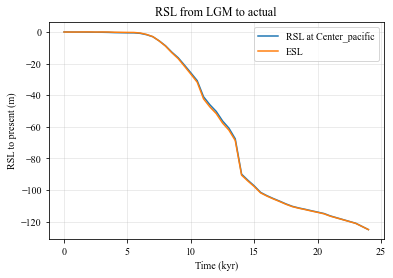

In [9]:
for i in range(len(name)) :
    fig_RSL_time,ax_RSL_time=plt.subplots()
    ax_RSL_time.plot(model.time_step[2:],RSL_pt[i,1:],label='RSL at '+name[i])
    ax_RSL_time.plot(model.time_step[2:],ESL[1:],label='ESL')
    #rect=patches.Rectangle((zoom[0],zoom[2]), zoom[1]-zoom[0],zoom[3]-zoom[2], linewidth=1,edgecolor='k', facecolor='None',label='Zoom',figure=fig_RSL_time)
    #ax_RSL_time.add_patch(rect)
    plt.title('RSL from LGM to actual')
    plt.xlabel('Time (kyr)')
    plt.ylabel('RSL to present (m)')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()
    fig_RSL_time.savefig(way+'RSL_'+name[i] +'.svg',format='svg')

In [12]:
import pandas
table=pandas.DataFrame(np.concatenate((np.expand_dims(model.time_step[2:],0),RSL_pt[:,1:],np.expand_dims(ESL[1:],0))).transpose(),columns=['time']+name+['ESL'])
print(table)
table.to_csv(way+'RSL_ESL_all.csv')

    time      Amazon  Changjianh       Congo         Fly       Gange  \
0   24.0 -125.700320 -113.584506 -110.534032 -109.591778 -118.957335   
1   23.0 -121.718312 -109.817333 -106.438554 -105.853417 -114.877864   
2   22.0 -119.381646 -107.689468 -104.106426 -103.760835 -112.692109   
3   21.0 -117.078247 -105.557133 -101.817298 -101.786384 -110.570118   
4   20.5 -115.663948 -104.230801 -100.305037 -100.621370 -109.224064   
5   20.0 -114.845365 -103.539498  -99.360054  -99.952889 -108.423823   
6   19.5 -114.209906 -103.000311  -98.456531  -99.449802 -107.692446   
7   19.0 -113.537861 -102.356482  -97.489611  -98.842534 -106.900235   
8   18.5 -112.911008 -101.756770  -96.613851  -98.287628 -106.192076   
9   18.0 -112.051483 -100.973589  -95.572405  -97.550785 -105.303977   
10  17.5 -110.643607  -99.708958  -94.027915  -96.327797 -103.899174   
11  17.0 -108.958789  -98.281081  -92.209330  -94.844517 -102.258518   
12  16.5 -107.349882  -96.987809  -90.488681  -93.438563 -100.72

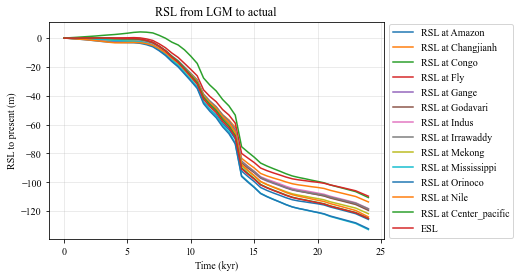

In [10]:
fig_RSL_time,ax_RSL_time=plt.subplots()
for i in range(len(name)):
    ax_RSL_time.plot(model.time_step[2:],RSL_pt[i,1:],label='RSL at '+name[i])
ax_RSL_time.plot(model.time_step[2:],ESL[1:],label='ESL')
#rect=patches.Rectangle((zoom[0],zoom[2]), zoom[1]-zoom[0],zoom[3]-zoom[2], linewidth=1,edgecolor='k', facecolor='None',label='Zoom',figure=fig_RSL_time)
#ax_RSL_time.add_patch(rect)
plt.title('RSL from LGM to actual')
plt.xlabel('Time (kyr)')
plt.ylabel('RSL to present (m)')
plt.grid(alpha=0.3)
#box = ax.get_position()
#ax_RSL.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

In [11]:
fig_RSL_time.savefig(way+'RSL_all' +'.svg',format='svg')

In [ ]:
fig_RSL_time_zoom,ax_RSL_time_zoom=plt.subplots()
ax_RSL_time_zoom.plot(model.time_step[1:],RSL_pt1,label='RLS at depot center')
ax_RSL_time_zoom.plot(model.time_step[1:],RSL_pt2,label='RSL at Yangon')
ax_RSL_time_zoom.plot(model.time_step[1:],ESL,label='ESL')
plt.grid(alpha=0.3)
plt.axis([0,8,-3,0.2])
plt.title('RSL zoom last 8 kyr')
plt.xlabel('Time (kyr)')
plt.ylabel('RSL to present(m)')
plt.legend()
plt.show()

In [ ]:
fig_RSL_time.savefig(way+'time_RSL.svg',format='svg')
fig_RSL_time_zoom.savefig(way+'time_RSL_zoom.svg',format='svg')

In [ ]:
ax_RSL,D_RSL_totale,D_RSL_local,fig_RSL=model.plot_map(model.delSL-model.delSL[-1,:],0.5,lat=lat_map,lon=lon_map,title='RSL',colorbar_title='RSL to present (m)')
ax_RSL.scatter(lon_pt_1,lat_pt_1-90,s=150,marker='*',color='y',edgecolor='k',label='Observation point')
ax_RSL.scatter(lon_pt_2,lat_pt_2-90,s=150,marker='*',color='y',edgecolor='k')
plt.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])

In [ ]:
fig_RSL.savefig(way+'map_RSL.svg',format='svg')

# Plot earth deformation

## map plot

In [ ]:
ax_e_i,D_e_i,D_e_i_local,fig_e_i=model.plot_map_derivation(-(model.delR_e_i)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic ice deformation',colorbar_title='Defomation(mm/yr)')
ax_e_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_o,D_e_o,D_e_o_local,fig_e_o=model.plot_map_derivation(-(model.delR_e_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_e_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_e_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_e_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_o.legend()
ax_e_s,D_e_s,D_e_s_local,fig_e_s=model.plot_map_derivation(-(model.delR_e_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Elastic sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_e_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_e_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_e_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_e_s.legend()
ax_v_i,D_v_i,D_v_i_local,fig_v_i=model.plot_map_derivation(-(model.delR_v_i)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous ice deformation',colorbar_title='Defomation(mm/yr)')
ax_v_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_s,D_v_s,D_v_s_local,fig_v_s=model.plot_map_derivation(-(model.delR_v_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_v_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_v_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_v_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_s.legend()
ax_v_o,D_v_o,D_v_o_local,fig_v_o=model.plot_map_derivation(-(model.delR_v_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Viscuous ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_v_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_v_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_v_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_v_o.legend()

In [ ]:
fig_e_i.savefig(way+'map_e_i_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_e_o.savefig(way+'map_e_o_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_e_s.savefig(way+'map_e_s_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_v_i.savefig(way+'map_v_i_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_v_o.savefig(way+'map_v_o_' + str(time_plot) + '.svg',dpi=300,format='svg')
fig_v_s.savefig(way+'map_v_s_' + str(time_plot) + '.svg',dpi=300,format='svg')

In [ ]:
ax_tot,D_tot,D_tot_local,fig_tot=model.plot_map_derivation(-(model.delR_v_o+model.delR_v_i+model.delR_v_s+model.delR_e_o+model.delR_e_i+model.delR_e_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total deformation',colorbar_title='Defomation(mm/yr)')
ax_tot.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot.legend()
ax_tot_s,D_tot_s,D_tot_s_local,fig_tot_s=model.plot_map_derivation(-(model.delR_v_s+model.delR_e_s)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total sediment deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_s.legend()
ax_tot_i,D_tot_i,D_tot_i_local,fig_tot_i=model.plot_map_derivation(-(model.delR_v_i+model.delR_e_i)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total ice deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_o,D_tot_o,D_tot_o_local,fig_tot_o=model.plot_map_derivation(-(model.delR_v_o+model.delR_e_o)*1000,time_plot,lat=lat_map,lon=lon_map,title='Total ocean deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_o.legend()

In [ ]:
fig_tot_s.savefig(way+'map_tot_s.svg',dpi=300,format='svg')
fig_tot_i.savefig(way+'map_tot_i.svg',dpi=300,format='svg')
fig_tot_o.savefig(way+'map_tot_o.svg',dpi=300,format='svg')
fig_tot.savefig(way+'map_tot.svg',dpi=300,format='svg')

## Tables of statistics

In [ ]:
import pandas
m=np.array([[D_v_s.min(),D_v_i.min(),D_v_o.min(),D_e_s.min(),D_e_i.min(),D_e_o.min(),D_tot_s.min(),D_tot_i.min(),D_tot_o.min()],[D_v_s.max(),D_v_i.max(),D_v_o.max(),D_e_s.max(),D_e_i.max(),D_e_o.max(),D_tot_s.max(),D_tot_i.max(),D_tot_o.max()],[D_v_s.mean(),D_v_i.mean(),D_v_o.mean(),D_e_s.mean(),D_e_i.mean(),D_e_o.mean(),D_tot_s.mean(),D_tot_i.mean(),D_tot_o.mean()],[np.median(D_v_s),np.median(D_v_i),np.median(D_v_o),np.median(D_e_s),np.median(D_e_i),np.median(D_e_o),np.median(D_tot_s),np.median(D_tot_i),np.median(D_tot_o)]])
mux=pandas.MultiIndex.from_product([['Viscuous','Elastic','Total'], ['sediment','ice','ocean']])
table_global=pandas.DataFrame(m.round(2),columns=mux,index=['minimum','maximum','mean','median'])
table_global.insert(table_global.shape[1],("Total","Total"),np.array([D_tot.min(),D_tot.max(),D_tot.mean(),np.median(D_tot)]).round(2))
print(table_global)

In [ ]:
import pandas
m=np.array([[D_v_s_local.min(),D_v_i_local.min(),D_v_o_local.min(),D_e_s_local.min(),D_e_i_local.min(),D_e_o_local.min(),D_tot_s_local.min(),D_tot_i_local.min(),D_tot_o_local.min()],[D_v_s_local.max(),D_v_i_local.max(),D_v_o_local.max(),D_e_s_local.max(),D_e_i_local.max(),D_e_o_local.max(),D_tot_s_local.max(),D_tot_i_local.max(),D_tot_o_local.max()],[D_v_s_local.mean(),D_v_i_local.mean(),D_v_o_local.mean(),D_e_s_local.mean(),D_e_i_local.mean(),D_e_o_local.mean(),D_tot_s_local.mean(),D_tot_i_local.mean(),D_tot_o_local.mean()],[np.median(D_v_s_local),np.median(D_v_i_local),np.median(D_v_o_local),np.median(D_e_s_local),np.median(D_e_i_local),np.median(D_e_o_local),np.median(D_tot_s_local),np.median(D_tot_i_local),np.median(D_tot_o_local)]])
mux=pandas.MultiIndex.from_product([['Viscuous','Elastic','Total'], ['sediment','ice','ocean']])
table_local=pandas.DataFrame(m.round(2),columns=mux,index=['minimum','maximum','mean','median'])
table_local.insert(table_local.shape[1],("Total","Total"),np.array([D_tot_local.min(),D_tot_local.max(),D_tot_local.mean(),np.median(D_tot_local)]).round(2))
print(table_local)

In [ ]:
table_global.to_csv(way+'Global_statistic_' + str(time_plot) + '.csv')
table_local.to_csv(way+'Local_statistic_' + str(time_plot) + '.csv')

# Transect

## Initialization

In [ ]:
import numpy as np
from scipy import interpolate
import math


lat_trans_1=np.linspace(T_1_lat[0],T_1_lat[1],l)
lon_trans_1=np.linspace(T_1_lon[0],T_1_lon[1],l)

lat_trans_2=np.linspace(T_2_lat[0],T_2_lat[1],l)
lon_trans_2=np.linspace(T_2_lon[0],T_2_lon[1],l)

elons_res,lats_res=np.meshgrid(model.elons_res,model.lats_res)

D_lin_v_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_v_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_v_i_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_i.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_e_i_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_i.flatten(),(lon_trans_1,lat_trans_1),method='linear')
rad_lat_t_1=math.pi*lat_trans_1/180
rad_lon_t_1=math.pi*lon_trans_1/180
L_t_1=6371*np.arccos(np.cos(rad_lat_t_1[0])*np.cos(rad_lat_t_1)+np.sin(rad_lat_t_1[0])*np.sin(rad_lat_t_1)*np.cos(rad_lon_t_1[0]-rad_lon_t_1))
L_t_1[0]=0

D_lin_v_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_v_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_v_i_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_v_i.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_e_i_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_e_i.flatten(),(lon_trans_2,lat_trans_2),method='linear')
rad_lat_t_2=math.pi*lat_trans_2/180
rad_lon_t_2=math.pi*lon_trans_2/180
L_t_2=6371*np.arccos(np.cos(rad_lat_t_2[0])*np.cos(rad_lat_t_2)+np.sin(rad_lat_t_2[0])*np.sin(rad_lat_t_2)*np.cos(rad_lon_t_2[0]-rad_lon_t_2))
L_t_2[0]=0


In [ ]:
from cmath import nan
lon_m,lat_m=np.meshgrid(model.grid.elons,model.grid.lats)
sed_lin_t_1_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[time_ind-1,:,:].flatten()-model.sed.sed[time_ind,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
sed_lin_v_t_1_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[model.time_step_number-time_ind,:,:].flatten(),(lon_trans_1,lat_trans_1),method='linear')
sed_lin_t_1=sed_lin_t_1_.copy()
sed_lin_t_1[sed_lin_t_1_<=sediment_ceil]=nan
sed_lin_t_1[sed_lin_t_1_>sediment_ceil]=0
sed_lin_v_t_1=sed_lin_v_t_1_.copy()
sed_lin_v_t_1[sed_lin_v_t_1_<=sediment_v_ceil]=nan
sed_lin_v_t_1[sed_lin_v_t_1_>sediment_v_ceil]=0

sed_lin_t_2_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[time_ind-1,:,:].flatten()-model.sed.sed[time_ind,:,:].flatten(),(lon_trans_2,lat_trans_2),method='linear')
sed_lin_v_t_2_=interpolate.griddata((lon_m.flatten(),lat_m.flatten()),model.sed.sed[model.time_step_number-time_ind,:,:].flatten(),(lon_trans_2,lat_trans_2),method='linear')
sed_lin_t_2=sed_lin_t_2_.copy()
sed_lin_t_2[sed_lin_t_2_<=sediment_ceil]=nan
sed_lin_t_2[sed_lin_t_2_>sediment_ceil]=0
sed_lin_v_t_2=sed_lin_v_t_2_.copy()
sed_lin_v_t_2[sed_lin_v_t_2_<=sediment_v_ceil]=nan
sed_lin_v_t_2[sed_lin_v_t_2_>sediment_v_ceil]=0

## plot transect

In [ ]:
fig_v_t_1,ax_v_t_1=plt.subplots()
ax_v_t_1.plot(L_t_1,D_lin_v_s_t_1,label='Sediment load',color=sediment_color)
ax_v_t_1.plot(L_t_1,D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_v_t_1.plot(L_t_1,D_lin_v_o_t_1,label='Ocean load',color=ocean_color)
ax_v_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_v_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_v_t_1.legend()
l=ax_v_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_v_t_1.annotate('A', (0,max(ax_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_v_t_1.annotate('B', (L_t_1[-1],max(ax_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_v_t_2,ax_v_t_2=plt.subplots()
ax_v_t_2.plot(L_t_2,D_lin_v_s_t_2,label='Sediment load',color=sediment_color)
ax_v_t_2.plot(L_t_2,D_lin_v_i_t_2,label='Ice load',color=ice_color)
ax_v_t_2.plot(L_t_2,D_lin_v_o_t_2,label='Ocean load',color=ocean_color)
ax_v_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_v_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_v_t_2.legend()
l=ax_v_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_v_t_2.annotate('C', (0,max(ax_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_v_t_2.annotate('D', (L_t_2[-1],max(ax_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_e_t_1,ax_e_t_1=plt.subplots()
ax_e_t_1.plot(L_t_1,D_lin_e_s_t_1,label='Sediment load',color=sediment_color)
ax_e_t_1.plot(L_t_1,D_lin_e_i_t_1,label='Ice load',color=ice_color)
ax_e_t_1.plot(L_t_1,D_lin_e_o_t_1,label='Ocean load',color=ocean_color)
ax_e_t_1.plot(L_t_1,sed_lin_t_1+max(ax_e_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
l=ax_e_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_e_t_1.annotate('A', (0,max(ax_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_e_t_1.annotate('B', (L_t_1[-1],max(ax_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.legend()
plt.show()

fig_e_t_2,ax_e_t_2=plt.subplots()
ax_e_t_2.plot(L_t_2,D_lin_e_s_t_2,label='Sediment load',color=sediment_color)
ax_e_t_2.plot(L_t_2,D_lin_e_i_t_2,label='Ice load',color=ice_color)
ax_e_t_2.plot(L_t_2,D_lin_e_o_t_2,label='Ocean load',color=ocean_color)
ax_e_t_2.plot(L_t_2,sed_lin_t_2+max(ax_e_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_e_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_e_t_2.annotate('C', (0,max(ax_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_e_t_2.annotate('D', (L_t_2[-1],max(ax_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_v_s_t_1,label='Sediment load',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_i_t_1+D_lin_v_i_t_1,label='Ice load',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_o_t_1+D_lin_v_o_t_1,label='Ocean load',color=ocean_color)
ax_tot_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_t_2,ax_tot_t_2=plt.subplots()
ax_tot_t_2.plot(L_t_2,D_lin_e_s_t_2+D_lin_v_s_t_2,label='Sediment load',color=sediment_color)
ax_tot_t_2.plot(L_t_2,D_lin_e_i_t_2+D_lin_v_i_t_2,label='Ice load',color=ice_color)
ax_tot_t_2.plot(L_t_2,D_lin_e_o_t_2+D_lin_v_o_t_2,label='Ocean load',color=ocean_color)
ax_tot_t_2.plot(L_t_2,sed_lin_t_2+max(ax_tot_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_2.annotate('C', (0,max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_v_t_1,ax_tot_v_t_1=plt.subplots()
ax_tot_v_t_1.plot(L_t_1,D_lin_v_s_t_1+D_lin_v_i_t_1+D_lin_v_o_t_1,label='Total viscuous load')
ax_tot_v_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_v_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_v_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_v_t_1.annotate('A', (0,max(ax_tot_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_v_t_1.annotate('B', (L_t_1[-1],max(ax_tot_v_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_v_t_2,ax_tot_v_t_2=plt.subplots()
ax_tot_v_t_2.plot(L_t_2,D_lin_v_s_t_2+D_lin_v_i_t_2+D_lin_v_o_t_2,label='Total viscuous load')
ax_tot_v_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_v_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_v_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_v_t_2.annotate('C', (0,max(ax_tot_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_v_t_2.annotate('D', (L_t_2[-1],max(ax_tot_v_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_e_t_1,ax_tot_e_t_1=plt.subplots()
ax_tot_e_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_e_i_t_1+D_lin_e_o_t_1,label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_tot_e_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_e_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Total elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_e_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_e_t_1.annotate('A', (0,max(ax_tot_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_e_t_1.annotate('B', (L_t_1[-1],max(ax_tot_e_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_e_t_2,ax_tot_e_t_2=plt.subplots()
ax_tot_e_t_2.plot(L_t_2,D_lin_e_s_t_2+D_lin_e_i_t_2+D_lin_e_o_t_2,label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_tot_e_t_2.plot(L_t_2,sed_lin_t_2+max(ax_tot_e_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
plt.grid(alpha=0.3)
plt.title('Total elastic deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_e_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_e_t_2.annotate('C', (0,max(ax_tot_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_e_t_2.annotate('D', (L_t_2[-1],max(ax_tot_e_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_tot_t_1,ax_tot_tot_t_1=plt.subplots()
ax_tot_tot_t_1.plot(L_t_1,D_lin_v_s_t_1+D_lin_v_i_t_1+D_lin_v_o_t_1+D_lin_e_s_t_1+D_lin_e_i_t_1+D_lin_e_o_t_1,label='Total deformation',color='k')
ax_tot_tot_t_1.plot(L_t_1,sed_lin_t_1+max(ax_tot_tot_t_1.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_tot_t_1.annotate('A', (0,max(ax_tot_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_tot_t_2,ax_tot_tot_t_2=plt.subplots()
ax_tot_tot_t_2.plot(L_t_2,D_lin_v_s_t_2+D_lin_v_i_t_2+D_lin_v_o_t_2+D_lin_e_s_t_2+D_lin_e_i_t_2+D_lin_e_o_t_2,label='Total deformation',color='k')
ax_tot_tot_t_2.plot(L_t_2,sed_lin_t_2+max(ax_tot_tot_t_2.get_ylim()),linewidth=7,color=sediment_color,label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr')
ax_tot_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
plt.legend()
l=ax_tot_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_tot_t_2.annotate('C', (0,max(ax_tot_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()


In [ ]:
fig_v_t_1.savefig(way+'T1_v_'+str(time_plot)+'.svg',format='svg')
fig_v_t_2.savefig(way+'T2_v_'+str(time_plot)+'.svg',format='svg')
fig_e_t_1.savefig(way+'T1_e_'+str(time_plot)+'.svg',format='svg')
fig_e_t_2.savefig(way+'T2_e_'+str(time_plot)+'.svg',format='svg')
fig_tot_t_1.savefig(way+'T1_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_t_2.savefig(way+'T2_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_v_t_1.savefig(way+'T1_v_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_v_t_2.savefig(way+'T2_v_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_e_t_1.savefig(way+'T1_e_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_e_t_2.savefig(way+'T2_e_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_tot_t_1.savefig(way+'T1_tot_tot_'+str(time_plot)+'.svg',format='svg')
fig_tot_tot_t_2.savefig(way+'T2_tot_tot_'+str(time_plot)+'.svg',format='svg')

# Time plot


## Initialisation

In [ ]:
ax,y_v_s_pt_1=model.plot_at_point_derivation(-model.delR_v_s*10**3,lat_pt_1,lon_pt_1)
ax,y_e_s_pt_1=model.plot_at_point_derivation(-model.delR_e_s*10**3,lat_pt_1,lon_pt_1)
ax,y_v_o_pt_1=model.plot_at_point_derivation(-model.delR_v_o*10**3,lat_pt_1,lon_pt_1)
ax,y_e_o_pt_1=model.plot_at_point_derivation(-model.delR_e_o*10**3,lat_pt_1,lon_pt_1)
ax,y_v_i_pt_1=model.plot_at_point_derivation(-model.delR_v_i*10**3,lat_pt_1,lon_pt_1)
ax,y_e_i_pt_1=model.plot_at_point_derivation(-model.delR_e_i*10**3,lat_pt_1,lon_pt_1)

ax,y_v_s_pt_2=model.plot_at_point_derivation(-model.delR_v_s*10**3,lat_pt_2,lon_pt_2)
ax,y_e_s_pt_2=model.plot_at_point_derivation(-model.delR_e_s*10**3,lat_pt_2,lon_pt_2)
ax,y_v_o_pt_2=model.plot_at_point_derivation(-model.delR_v_o*10**3,lat_pt_2,lon_pt_2)
ax,y_e_o_pt_2=model.plot_at_point_derivation(-model.delR_e_o*10**3,lat_pt_2,lon_pt_2)
ax,y_v_i_pt_2=model.plot_at_point_derivation(-model.delR_v_i*10**3,lat_pt_2,lon_pt_2)
ax,y_e_i_pt_2=model.plot_at_point_derivation(-model.delR_e_i*10**3,lat_pt_2,lon_pt_2)

In [ ]:
s_tot_=np.concatenate((np.zeros((1,)),model.sed.sed.sum(1).sum(1)))-np.concatenate((model.sed.sed.sum(1).sum(1),np.zeros((1,))))

ice_tot_=np.concatenate((np.zeros((1,)),model.ice.ice.sum(1).sum(1)))-np.concatenate((model.ice.ice.sum(1).sum(1),np.zeros((1,))))

from spharm import sphericalobject
ocean_max=np.array([])
ocean=model.SL.delS.saved[9*47+1:,:]
for C in ocean :
    ocean_max=np.concatenate((ocean_max,np.array([sphericalobject(C,'coeff').coefftogrd(model).grd.sum(0).sum(0)])))

ocean_tot_=-np.concatenate((np.zeros((1,)),ocean_max))+np.concatenate((ocean_max,np.zeros((1,))))

In [ ]:
sediment_ceil=35
s_tot=s_tot_.copy()
s_tot[s_tot_>sediment_ceil]=0
s_tot[s_tot_<=sediment_ceil]=nan

ice_ceil=0.2*10**7
ice_tot=ice_tot_.copy()
ice_tot[ice_tot_>ice_ceil]=0
ice_tot[ice_tot_<=ice_ceil]=nan

ocean_ceil=1.5*10**6
ocean_tot=ocean_tot_.copy()
ocean_tot[ocean_tot_>ocean_ceil]=0
ocean_tot[ocean_tot_<=ocean_ceil]=nan

## plot time load

In [ ]:
fig_sediment,ax_sediment=plt.subplots()
ax_sediment.plot(model.time_step[:-1],s_tot_[1:-1],color=sediment_color,label='Global sediment thickness variation')
ax_sediment.plot(model.time_step[:-1],s_tot[1:-1]+max(ax_sediment.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('dH/dt (m)')
plt.title('Sédiment thickness variation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_ice,ax_ice=plt.subplots()
ax_ice.plot(model.time_step[:-1],ice_tot_[1:-1],color=ice_color,label='Global ice thickness variation')
ax_ice.plot(model.time_step[:-1],ice_tot[1:-1]+max(ax_ice.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('dI/dt (m)')
plt.title('Ice thickness variation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_ocean,ax_ocean=plt.subplots()
ax_ocean.plot(model.time_step[1:-1],ocean_tot_[:-1],color=ocean_color,label='Global ocean thickness variation')
ax_ocean.plot(model.time_step[1:-1],ocean_tot[:-1]+max(ax_ocean.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('dSL/dt (m)')
plt.title('Ocean thickness variation')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
fig_sediment.savefig(way+'sediment_amount.svg',dpi=300,format='svg')
fig_ocean.savefig(way+'sediment_ocean.svg',dpi=300,format='svg')
fig_ice.savefig(way+'sediment_ice.svg',dpi=300,format='svg')

## plot time

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(model.time_step[3:-1],y_e[2:-1])
fig_time_v_pt_1,ax_time_v_pt_1=plt.subplots()
ax_time_v_pt_1.plot(model.time_step[3:-1],y_v_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],y_v_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],y_v_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
ax_time_v_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_v_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_v_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_v_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Viscuous deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_v_pt_2,ax_time_v_pt_2=plt.subplots()
ax_time_v_pt_2.plot(model.time_step[3:-1],y_v_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],y_v_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],y_v_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
ax_time_v_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_v_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_v_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_v_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Viscuous deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_e_pt_1,ax_time_e_pt_1=plt.subplots()
ax_time_e_pt_1.plot(model.time_step[3:-1],y_e_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],y_e_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
ax_time_e_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_e_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_e_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_e_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Elastic deformation : depot centre')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_e_pt_2,ax_time_e_pt_2=plt.subplots()
ax_time_e_pt_2.plot(model.time_step[3:-1],y_e_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],y_e_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
ax_time_e_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_e_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_e_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_e_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Elastic deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_pt_1,ax_time_tot_pt_1=plt.subplots()
ax_time_tot_pt_1.plot(model.time_step[3:-1],y_e_s_pt_1[2:-1]+y_v_s_pt_1[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1]+y_v_o_pt_1[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],y_e_i_pt_1[2:-1]+y_v_i_pt_1[2:-1],label='Ice deformation',color=ice_color)
ax_time_tot_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_pt_2,ax_time_tot_pt_2=plt.subplots()
ax_time_tot_pt_2.plot(model.time_step[3:-1],y_e_s_pt_2[2:-1]+y_v_s_pt_2[2:-1],label='Sediment deformation',color=sediment_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1]+y_v_o_pt_2[2:-1],label='Ocean deformation',color=ocean_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],y_e_i_pt_2[2:-1]+y_v_i_pt_2[2:-1],label='Ice deformation',color=ice_color)
ax_time_tot_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
fig_time_v_pt_1.savefig(way+'time_v_t1.svg',dpi=300,format='svg')
fig_time_v_pt_2.savefig(way+'time_v_t2.svg',dpi=300,format='svg')
fig_time_e_pt_1.savefig(way+'time_e_t1.svg',dpi=300,format='svg')
fig_time_e_pt_2.savefig(way+'time_e_t2.svg',dpi=300,format='svg')
fig_time_tot_pt_1.savefig(way+'time_tot_t1.svg',dpi=300,format='svg')
fig_time_tot_pt_2.savefig(way+'time_tot_t2.svg',dpi=300,format='svg')

In [ ]:
fig_time_tot_v_pt_1,ax_time_tot_v_pt_1=plt.subplots()
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],y_v_o_pt_1[2:-1]+y_v_s_pt_1[2:-1]+y_v_i_pt_1[2:-1],label='Total viscuous deformation')
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_v_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_v_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total viscuous deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_v_pt_2,ax_time_tot_v_pt_2=plt.subplots()
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],y_v_o_pt_2[2:-1]+y_v_s_pt_2[2:-1]+y_v_i_pt_2[2:-1],label='Total viscuous deformation')
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_v_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_v_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total viscuous deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_e_pt_1,ax_time_tot_e_pt_1=plt.subplots()
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1]+y_e_s_pt_1[2:-1]+y_e_i_pt_1[2:-1],label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_e_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_e_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total elastic deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_e_pt_2,ax_time_tot_e_pt_2=plt.subplots()
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1]+y_e_s_pt_2[2:-1]+y_e_i_pt_2[2:-1],label='Total elastic deformation',color=(0.8,0.4,0.4))
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_e_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_e_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total elastic deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_tot_pt_1,ax_time_tot_tot_pt_1=plt.subplots()
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],y_e_o_pt_1[2:-1]+y_e_s_pt_1[2:-1]+y_e_i_pt_1[2:-1]+y_v_o_pt_1[2:-1]+y_v_s_pt_1[2:-1]+y_v_i_pt_1[2:-1],label='Total deformation',color='k')
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_tot_pt_1.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_tot_pt_1.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : depot center')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

fig_time_tot_tot_pt_2,ax_time_tot_tot_pt_2=plt.subplots()
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],y_e_o_pt_2[2:-1]+y_e_s_pt_2[2:-1]+y_e_i_pt_2[2:-1]+y_v_o_pt_2[2:-1]+y_v_s_pt_2[2:-1]+y_v_i_pt_2[2:-1],label='Total deformation',color='k')
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],s_tot[4:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=sediment_color,label='Sediment > '+ str(sediment_ceil) +'m')
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],ice_tot[4:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=ice_color,label='Ice > '+ str(ice_ceil) +'m')
ax_time_tot_tot_pt_2.plot(model.time_step[3:-1],ocean_tot[2:-1]+max(ax_time_tot_tot_pt_2.get_ylim()),linewidth=7,color=ocean_color,label='Ocean > '+ str(ocean_ceil) +'m')
plt.xlabel('Time (kyr)')
plt.ylabel('du/dt (mm/yr)')
plt.title('Total deformation : Yangon')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
fig_time_tot_v_pt_1.savefig(way+'time_total_v_t1.svg',dpi=300,format='svg')
fig_time_tot_v_pt_2.savefig(way+'time_total_v_t2.svg',dpi=300,format='svg')
fig_time_tot_e_pt_1.savefig(way+'time_total_e_t1.svg',dpi=300,format='svg')
fig_time_tot_e_pt_2.savefig(way+'time_total_e_t2.svg',dpi=300,format='svg')
fig_time_tot_tot_pt_1.savefig(way+'time_tot_tot_t1.svg',dpi=300,format='svg')
fig_time_tot_tot_pt_2.savefig(way+'time_tot_tot_t2.svg',dpi=300,format='svg')

# map G

In [ ]:
ax_tot_G,D_tot,D_tot_local,fig_tot_G=model.plot_map_derivation((model.delG_v_o+model.delG_v_i+model.delG_v_s+model.delG_e_o+model.delG_e_i+model.delG_e_s)*1000,0.5,lat=lat_map,lon=lon_map,title='Total geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G.legend()

In [ ]:
ax_tot_G_s,D_tot_G_s,D_tot_G_s_local,fig_tot_G_s=model.plot_map_derivation((model.delG_e_s+model.delG_v_s)*1000,0.5,lat=lat_map,lon=lon_map,title='Sediment geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G_s.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G_s.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G_s.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G_s.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G_s.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G_s.legend()

In [ ]:
ax_tot_G_i,D_tot_G_i,D_tot_G_i_local,fig_tot_G_i=model.plot_map_derivation((model.delG_e_i+model.delG_v_i)*1000,0.5,lat=lat_map,lon=lon_map,title='Ice geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G_i.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G_i.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G_i.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G_i.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G_i.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G_i.legend()

In [ ]:
ax_tot_G_o,D_tot_G_o,D_tot_G_o_local,fig_tot_G_o=model.plot_map_derivation((model.delG_e_o+model.delG_v_o)*1000,0.5,lat=lat_map,lon=lon_map,title='Ocean geoïd deformation',colorbar_title='Defomation(mm/yr)')
ax_tot_G_o.contour(long,lati,sed_v_cut,levels=[sediment_v_ceil],colors=[sediment_color_dark])
ax_tot_G_o.plot([-1,-0.1],[-95,-94],label='Sediments '+ str(sediment_v_ceil)+'m',color=sediment_color_dark)
ax_tot_G_o.contour(long,lati,sed_cut,levels=[sediment_ceil],colors=[sediment_color])
ax_tot_G_o.plot([-1,-0.1],[-95,-94],label='Sedimentation > '+ str(sediment_ceil_derived*1000) +'mm/yr',color=sediment_color)
ax_tot_G_o.axis([lon_map[0],lon_map[1],lat_map[0],lat_map[1]])
ax_tot_G_o.legend()

In [ ]:
fig_tot_G.savefig(way+'map_tot_G.svg',format='svg')
fig_tot_G_s.savefig(way+'map_tot_G_s.svg',format='svg')
fig_tot_G_i.savefig(way+'map_tot_G_i.svg',format='svg')
fig_tot_G_o.savefig(way+'map_tot_G_o.svg',format='svg')

In [ ]:
import numpy as np
from scipy import interpolate
import math


lat_trans_1=np.linspace(T_1_lat[0],T_1_lat[1],l)
lon_trans_1=np.linspace(T_1_lon[0],T_1_lon[1],l)

lat_trans_2=np.linspace(T_2_lat[0],T_2_lat[1],l)
lon_trans_2=np.linspace(T_2_lon[0],T_2_lon[1],l)

elons_res,lats_res=np.meshgrid(model.elons_res,model.lats_res)

D_lin_tot_G_s_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_s.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_tot_G_i_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_i.flatten(),(lon_trans_1,lat_trans_1),method='linear')
D_lin_tot_G_o_t_1=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_o.flatten(),(lon_trans_1,lat_trans_1),method='linear')
rad_lat_t_1=math.pi*lat_trans_1/180
rad_lon_t_1=math.pi*lon_trans_1/180
L_t_1=6371*np.arccos(np.cos(rad_lat_t_1[0])*np.cos(rad_lat_t_1)+np.sin(rad_lat_t_1[0])*np.sin(rad_lat_t_1)*np.cos(rad_lon_t_1[0]-rad_lon_t_1))
L_t_1[0]=0

D_lin_tot_G_s_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_s.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_tot_G_i_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_i.flatten(),(lon_trans_2,lat_trans_2),method='linear')
D_lin_tot_G_o_t_2=interpolate.griddata((elons_res.flatten(),lats_res.flatten()),D_tot_G_o.flatten(),(lon_trans_2,lat_trans_2),method='linear')
rad_lat_t_2=math.pi*lat_trans_2/180
rad_lon_t_2=math.pi*lon_trans_2/180
L_t_2=6371*np.arccos(np.cos(rad_lat_t_2[0])*np.cos(rad_lat_t_2)+np.sin(rad_lat_t_2[0])*np.sin(rad_lat_t_2)*np.cos(rad_lon_t_2[0]-rad_lon_t_2))
L_t_2[0]=0

In [ ]:
fig_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1,label='Sediment load',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_i_t_1,label='Ice load',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_o_t_1,label='Ocean load',color=ocean_color)
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

fig_tot_t_2,ax_tot_t_2=plt.subplots()
ax_tot_t_2.plot(L_t_2,D_lin_tot_G_s_t_2,label='Sediment load',color=sediment_color)
ax_tot_t_2.plot(L_t_2,D_lin_tot_G_i_t_2,label='Ice load',color=ice_color)
ax_tot_t_2.plot(L_t_2,D_lin_tot_G_o_t_2,label='Ocean load',color=ocean_color)
ax_tot_t_2.plot(L_t_2,sed_lin_v_t_2+max(ax_tot_t_2.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Viscuous deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_2.legend()
l=ax_tot_t_2.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_2.annotate('C', (0,max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_2.annotate('D', (L_t_2[-1],max(ax_tot_t_2.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [ ]:
fig_tot_t_1.savefig(way+'T1_tot_0.5_G.svg',format='svg')
fig_tot_t_2.savefig(way+'T2_tot_0.5_G.svg',format='svg')

In [ ]:
fig_tot_tot_t_1_G,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1,label='Sediment load G',color=sediment_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_i_t_1,label='Ice load G',color=ice_color)
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_o_t_1,label='Ocean load G',color=ocean_color)
ax_tot_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_v_s_t_1,label='Sediment load R',color=sediment_color,linestyle='--')
ax_tot_t_1.plot(L_t_1,D_lin_e_i_t_1+D_lin_v_i_t_1,label='Ice load R',color=ice_color,linestyle='--')
ax_tot_t_1.plot(L_t_1,D_lin_e_o_t_1+D_lin_v_o_t_1,label='Ocean load R',color=ocean_color,linestyle='--')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [ ]:
fig_tot_tot_t_1_G.savefig(way+'T1_tot_tot_0.5_G.svg',format='svg')

In [ ]:
fig_tot_tot_tot_t_1,ax_tot_t_1=plt.subplots()
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1+D_lin_tot_G_o_t_1+D_lin_tot_G_i_t_1,label='G',color='k')
ax_tot_t_1.plot(L_t_1,D_lin_e_s_t_1+D_lin_v_s_t_1+D_lin_e_o_t_1+D_lin_v_o_t_1+D_lin_e_i_t_1+D_lin_v_i_t_1,label='R',color='k',linestyle='--')
ax_tot_t_1.plot(L_t_1,D_lin_tot_G_s_t_1+D_lin_tot_G_o_t_1+D_lin_tot_G_i_t_1+D_lin_e_s_t_1+D_lin_v_s_t_1+D_lin_e_o_t_1+D_lin_v_o_t_1+D_lin_e_i_t_1+D_lin_v_i_t_1,label='Partial RSL',color='k',linestyle='dotted')
ax_tot_t_1.plot(L_t_1,sed_lin_v_t_1+max(ax_tot_t_1.get_ylim()),linewidth=7,color=sediment_color_dark,label='Sediment > '+ str(sediment_v_ceil) +'m')
plt.grid(alpha=0.3)
plt.title('Total deformation')
plt.xlabel('distance (km)')
plt.ylabel('du/dt (mm/yr)')
ax_tot_t_1.legend()
l=ax_tot_t_1.get_yticks()
step=(l[-1]-l[0])/(len(l)-1)/4
ax_tot_t_1.annotate('A', (0,max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
ax_tot_t_1.annotate('B', (L_t_1[-1],max(ax_tot_t_1.get_ylim())+step),xycoords='data',annotation_clip=False,fontsize='large')
plt.show()

In [ ]:
fig_tot_tot_tot_t_1.savefig(way+'T1_tot_tot_tot_0.5_G.svg',format='svg')